# 7. Снижение размерности. Практика

✍ В предыдущих юнитах вы познакомились с алгоритмами снижения размерности, и теперь можно считать, что вы обладаете знаниями обо всех основных аспектах кластеризации и уменьшения размерности.

Давайте потренируемся и применим полученные знания для решения очередной практической задачи.

Представьте, что вы работаете в международной гуманитарной организации, главная задача которой — борьба с бедностью и помощь людям из наименее развитых стран. Для выполнения своей миссии ваша организация периодически финансирует различные проекты, поддерживающие нуждающиеся регионы.

Вы собрали 100 миллионов долларов и должны принять решение, как распределить эти деньги — в какие страны их направить в первую очередь. Как выбрать, кто сильнее всего нуждается в финансовой поддержке?

Конечно, можно взять страны с самыми низкими доходами населения или с самой маленькой продолжительностью жизни. А может, лучше помочь странам, у которых самая высокая инфляция? По отдельным признакам выбирать достаточно сложно — нам хотелось бы выявить группы стран, в которых в целом ситуация вызывает опасения по совокупности значений всех признаков.

Для решения этой задачи мы как раз и используем наши навыки в снижении размерности и кластеризации данных: попробуем выделить кластеры стран, схожих по своим характеристикам, и среди них выявить кластер особо нуждающихся.

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
import pandas as pd
data = pd.read_csv('data/Country-data.csv')
data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


* country — название страны;
* child_mort — показатель смертности детей до 5 лет;
* exports — показатель экспорта на душу населения;
* health — показатель затрат на здравоохранение на душу населения;
* imports — показатель импорта на душу населения;
* Income — средний доход на душу населения;
* Inflation — годовой показатель инфляции;
* life_expec — средняя продолжительность жизни;
* total_fer — суммарный коэффициент рождаемости;
* gdpp — значение ВВП на душу населения.

**Задание 7.1**

Какова максимальная продолжительность жизни? Ответ округлите до одного знака после точки-разделителя.

In [52]:
data['life_expec'].max()

82.8

**Задание 7.2**

Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя. 

In [53]:
from sklearn.preprocessing import StandardScaler

X = data.drop('country',axis =1)  
y = data['country']

scaler = StandardScaler()
scaler.fit(X) 
X_norm = scaler.transform(X)  
print(round(X_norm[0][0], 2))

1.29


**Задание 7.3**

Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.

Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

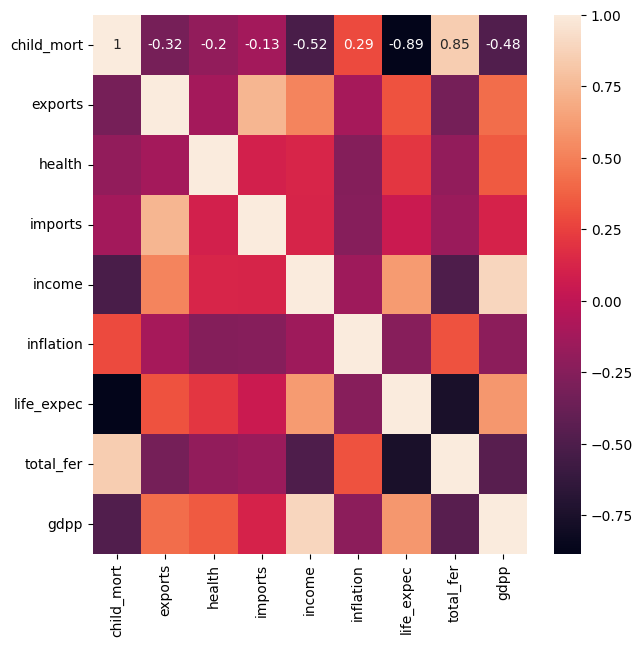

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

X_norm_df = pd.DataFrame(X_norm,columns=X.columns)
plt.figure(figsize = (7,7))       
sns.heatmap(X_norm_df.corr(),annot = True)
plt.show()

**Ответ**: 0.9

**Задание 7.4**

Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, random_state=42).fit(X_norm)
len(pca.components_)

5

**Задание 7.5**

Оставьте только главные компоненты, выделенные в предыдущем задании. Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.

In [56]:
pca.explained_variance_ratio_[0]

0.4595173978609588

**Задание 7.6**

Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

Постройте матрицу корреляций. Сколько значений в ней превышают **0.001**, не считая единичных значений на главной диагонали?

<Axes: >

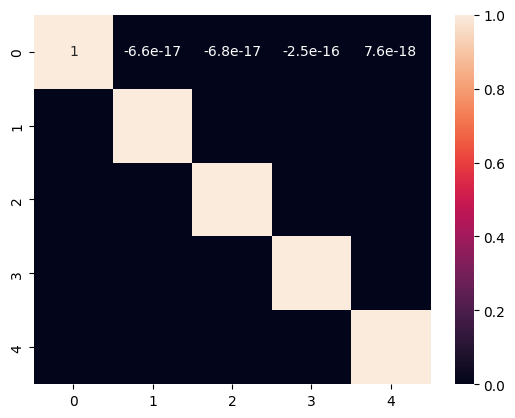

In [57]:
import numpy as np

X_after_pca = pca.fit_transform(X_norm)
corr_after_pca = np.corrcoef(X_after_pca.transpose())
sns.heatmap(corr_after_pca, annot=True)

Как видим, даже самый большой коэффициент корреляции практически неотличим от нуля — это значит, что мы всё сделали правильно, и теперь у нас есть пять независимых признаков, объясняющих до 90 % дисперсии.

**Задание 7.7**

Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять?

In [58]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(X_after_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_after_pca, cluster_labels)
    print(i, silhouette_avg)

2 0.30441994992318155
3 0.3079769786519013
4 0.32351543073626515
5 0.3255806324717653
6 0.2671181792769642
7 0.22569509381249062
8 0.24037703530553398
9 0.27436633921353193
10 0.24031234938202223


**Задание 7.8**

Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм k-means с этим параметром. В качестве значения random_state возьмите число 1.

В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?

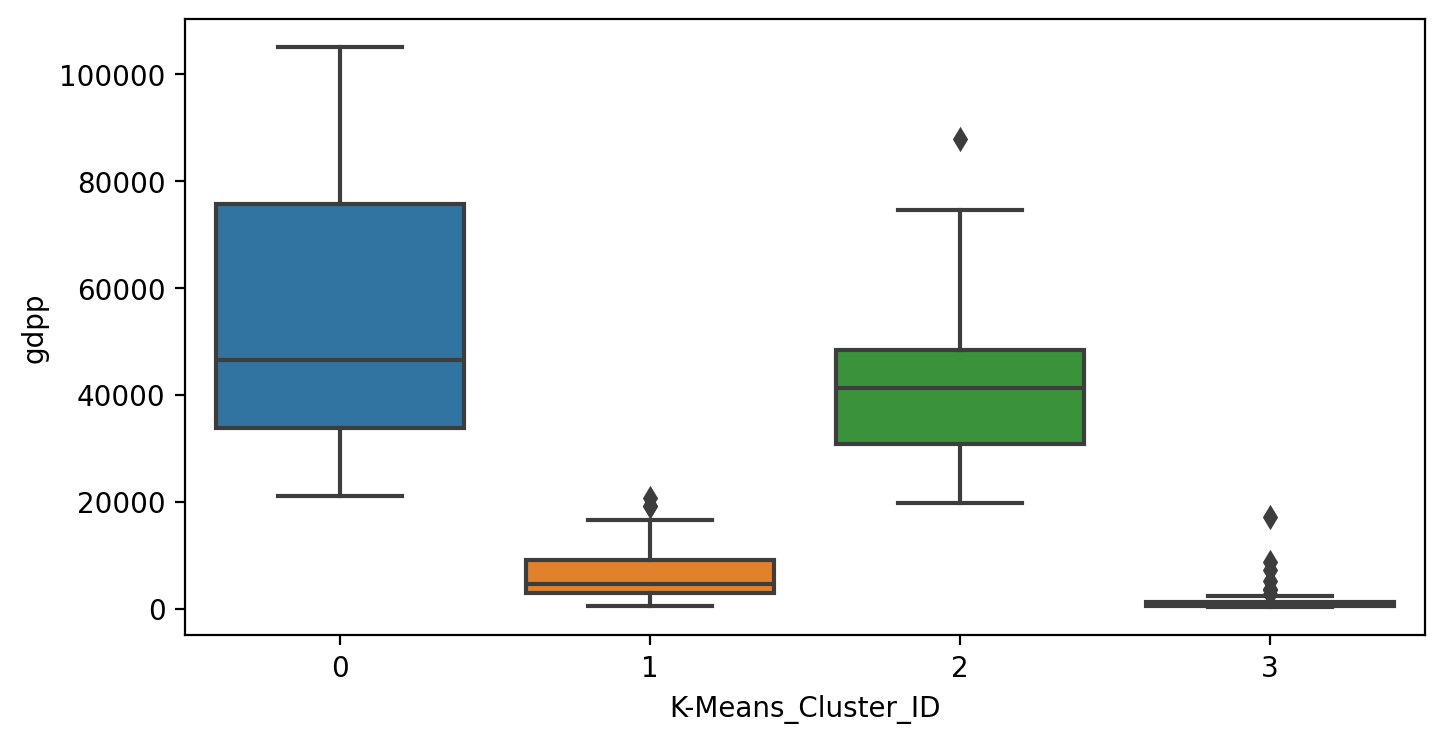

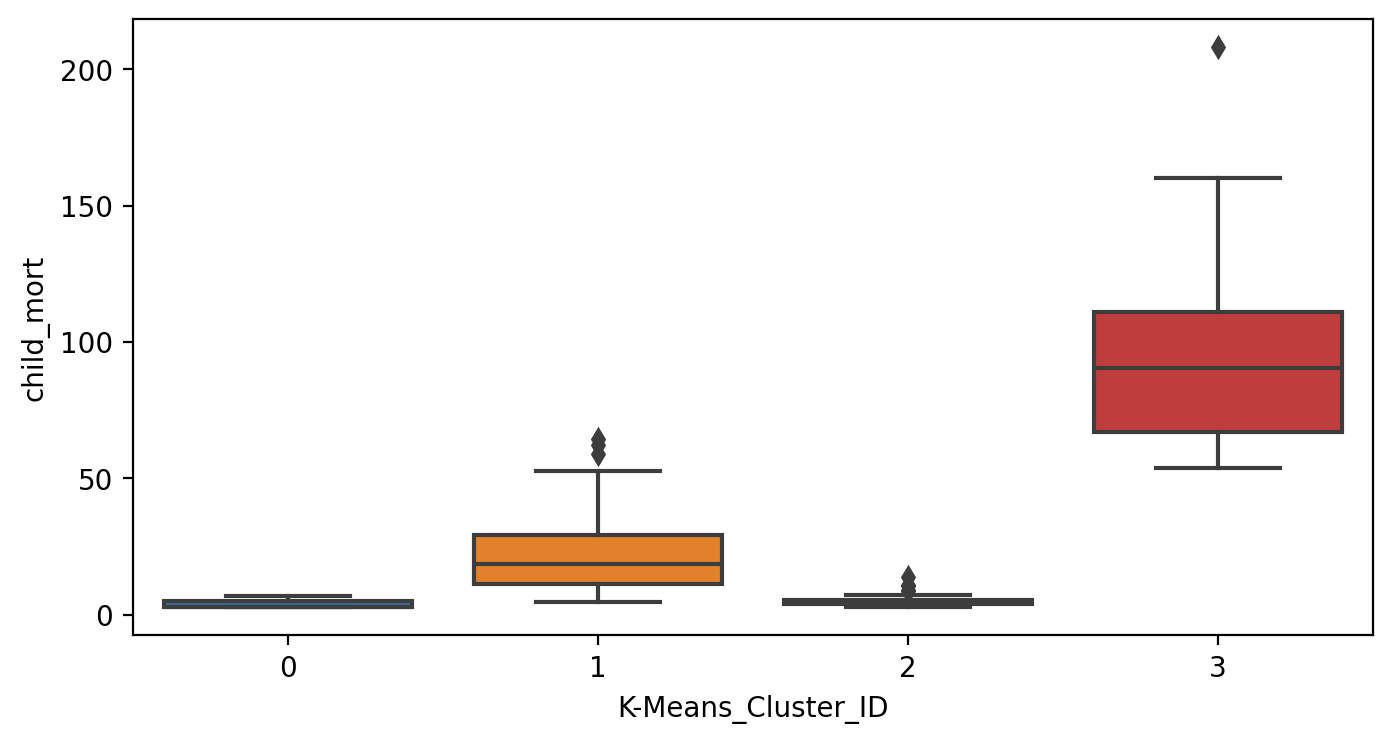

In [59]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_after_pca)

data['K-Means_Cluster_ID'] = kmeans.labels_
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=data)
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=data)
plt.show()

**Задание 7.9**

Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи. Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, в которых самая маленькая продолжительность жизни.

In [60]:
poorest_countries = data[data['K-Means_Cluster_ID'] == 1]
poorest_countries.sort_values(by = 'life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.620,63.0,3.50,2970,1
52,Fiji,24.1,57.8,4.86,63.9,7350,4.230,65.3,2.67,3650,1
101,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860,1
...,...,...,...,...,...,...,...,...,...,...,...
119,Peru,20.3,27.8,5.08,23.8,9960,5.710,77.9,2.54,5020,1
153,Turkey,19.1,20.4,6.74,25.5,18000,7.010,78.2,2.15,10700,1
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,1
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860,1


По продолжительности жизни

In [61]:
poorest_countries.sort_values(by = 'life_expec').values[0][0]

'Botswana'

In [62]:
poorest_countries.sort_values(by = 'life_expec').values[1][0]

'Solomon Islands'

In [63]:
poorest_countries.sort_values(by = 'life_expec').values[2][0]

'Vanuatu'